<a href="https://colab.research.google.com/github/sagarrokad1/Rossman-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
#importing libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import plotly 
import plotly.graph_objs as go

In [2]:
plotly.tools.set_credentials_file(username='sagar_rokad', api_key='vSEuybQ49Ku0BuhHu4Wt')

In [3]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Loading Dataset
rossman_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Retail Sales Prediction - Sagar Rokad/Data/Rossmann Stores Data.csv', low_memory= False)

In [5]:
store_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Retail Sales Prediction - Sagar Rokad/Data/store.csv', low_memory= False)

## Analysing the Rossman Dataset

In [6]:
rossman_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
rossman_df.shape

(1017209, 9)

In [8]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
#Checking Null Values
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
#No. Of Stores in the Dataset
rossman_df.Store.nunique()

1115

In [12]:
rossman_df.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [13]:
# extract year, month, day and week of year from "Date"

rossman_df['Date']=pd.to_datetime(rossman_df['Date'])

rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['Day'] = rossman_df['Date'].apply(lambda x: x.day)
rossman_df['WeekOfYear'] = rossman_df['Date'].apply(lambda x: x.weekofyear)

In [14]:
rossman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31


## EDA On Rossman Dataset

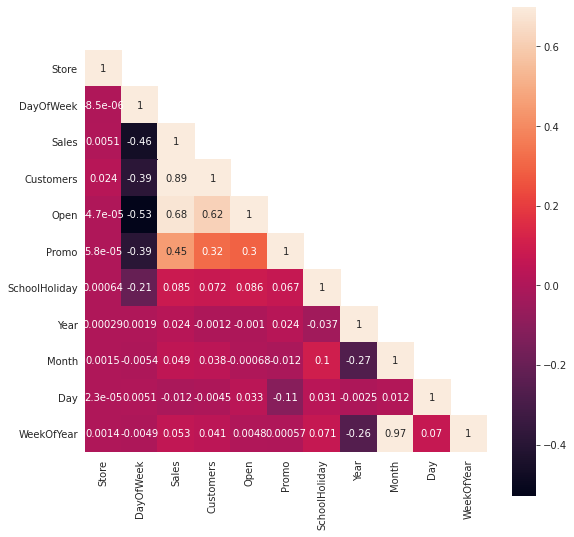

In [15]:
correlation_map = rossman_df[rossman_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

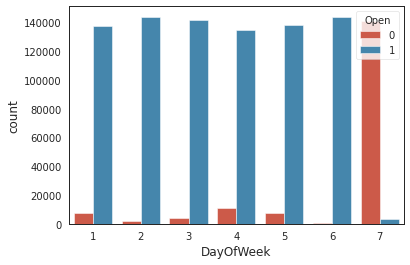

In [16]:
# The Store mainly closed on Sunday

sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



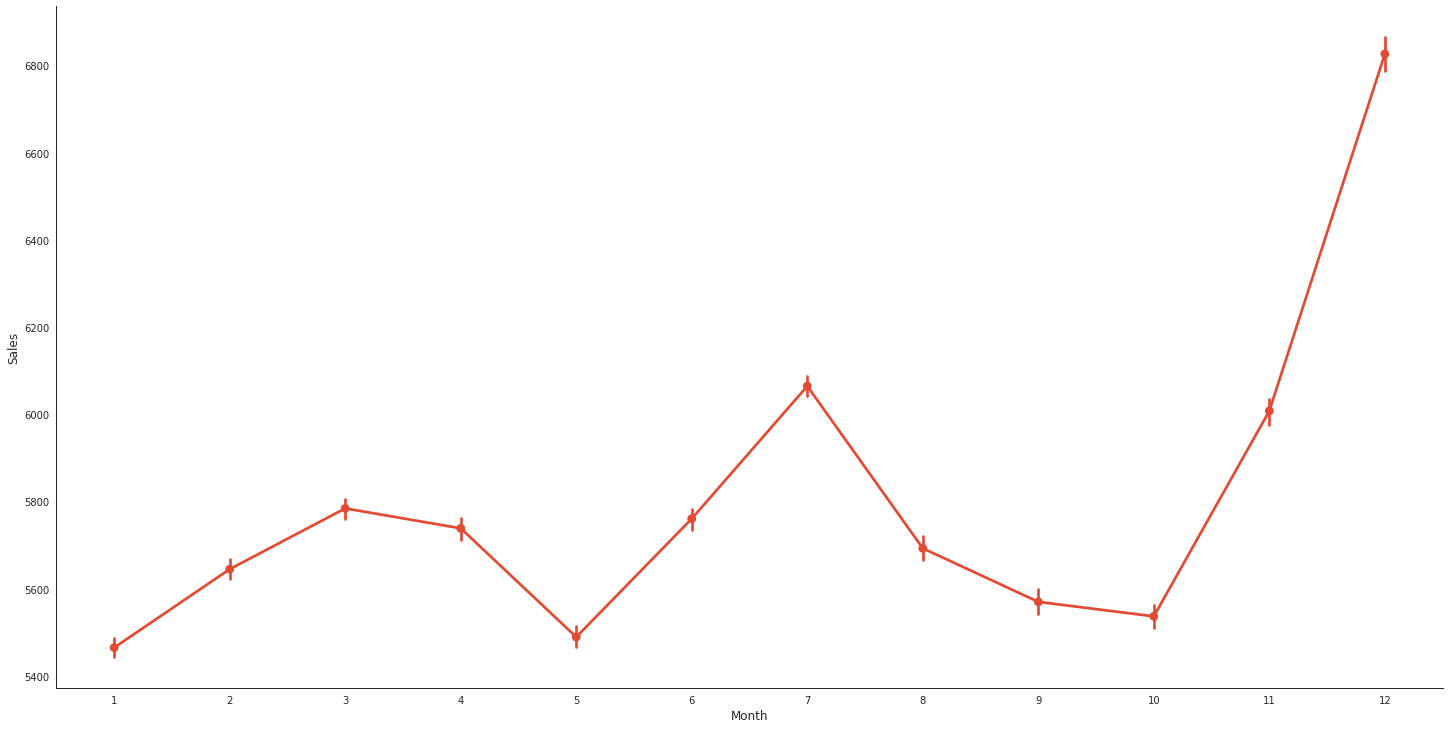

In [17]:
sns.factorplot(x="Month" ,y = "Sales" , data=rossman_df, kind="point", aspect=2,size=10)

**As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.**

In [18]:
rossman_df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

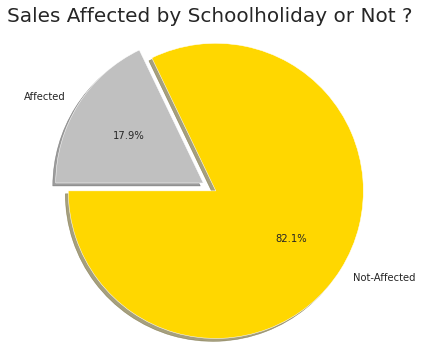

In [19]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


### Transforming Variable StateHoliday

In [20]:
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [21]:
rossman_df.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

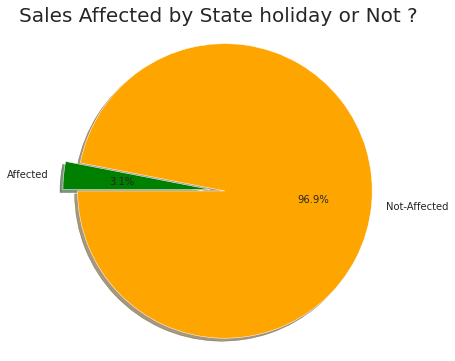

In [22]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.StateHoliday.value_counts()
colors = ['orange','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

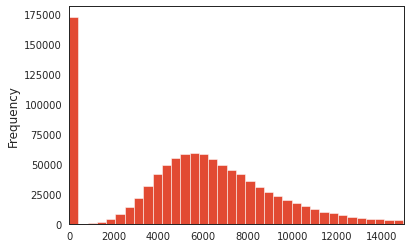

In [23]:
rossman_df["Sales"].plot(kind='hist',bins=100,xlim=(0,15000))

**Here 0 is showing because most of the time store was closed**

## Analysing the Store Dataset

In [24]:
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [25]:
store_df.shape

(1115, 10)

In [26]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [27]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

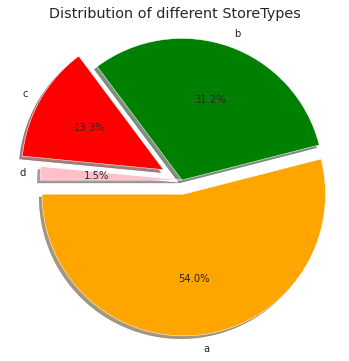

In [28]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


### Remove features with high percentages of missing values

#### we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.

In [29]:
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

### Replace missing values in features with low percentages of missing values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distributin of Store Competition Distance')

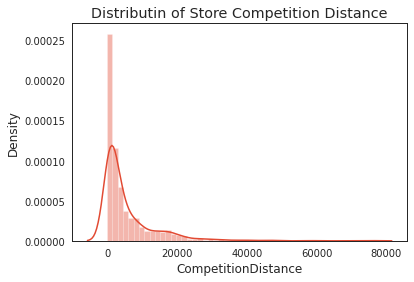

In [30]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

### The distribution is right skewed, so we'll replace missing values with the median.

In [31]:
# replace missing values in CompetitionDistance with median for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

## Joining Tables

In [32]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [33]:
df.shape

(1017209, 17)

## EDA On Merged Dataset

In [34]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers

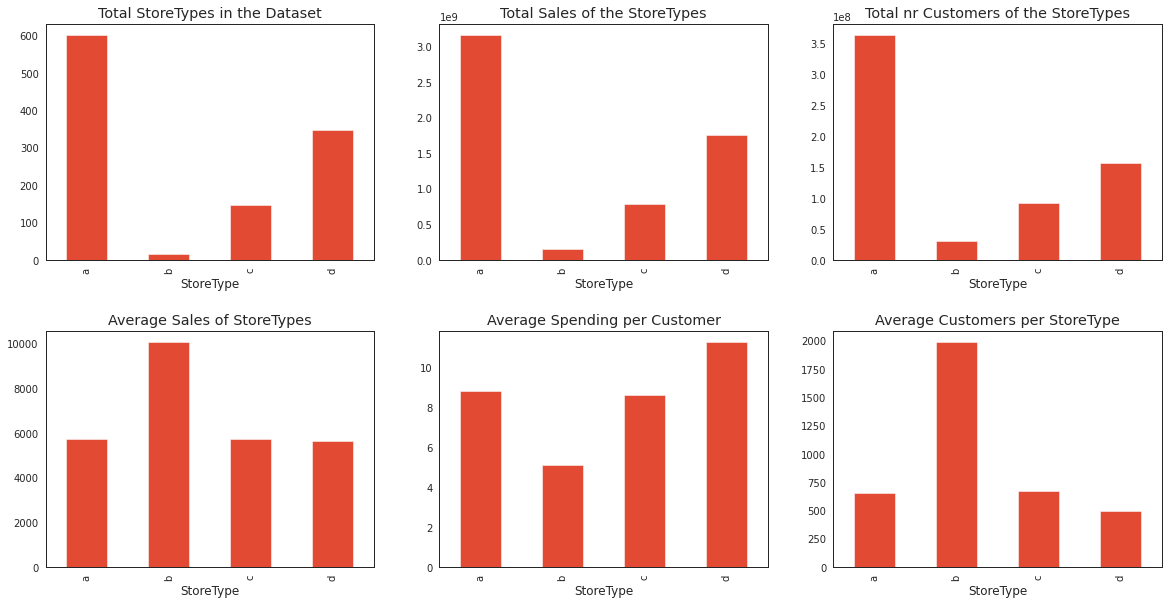

In [35]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.

**Lets check the Assortments**

So only the StoreType B has all assortments. I think thats why they are performing so good. Maybe this StoreType has more sales area.
      The assortment C is a good one, because the StoreType D has the best average customer spending.


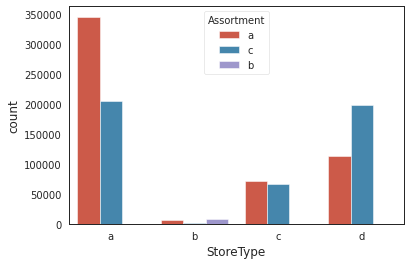

In [36]:
sns.countplot(data = df, x = "StoreType", hue = "Assortment", order=["a","b","c","d"]) 
print("""So only the StoreType B has all assortments. I think thats why they are performing so good. Maybe this StoreType has more sales area.
      The assortment C is a good one, because the StoreType D has the best average customer spending.""")

plt.show()

**Lets go ahead with the promotions**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



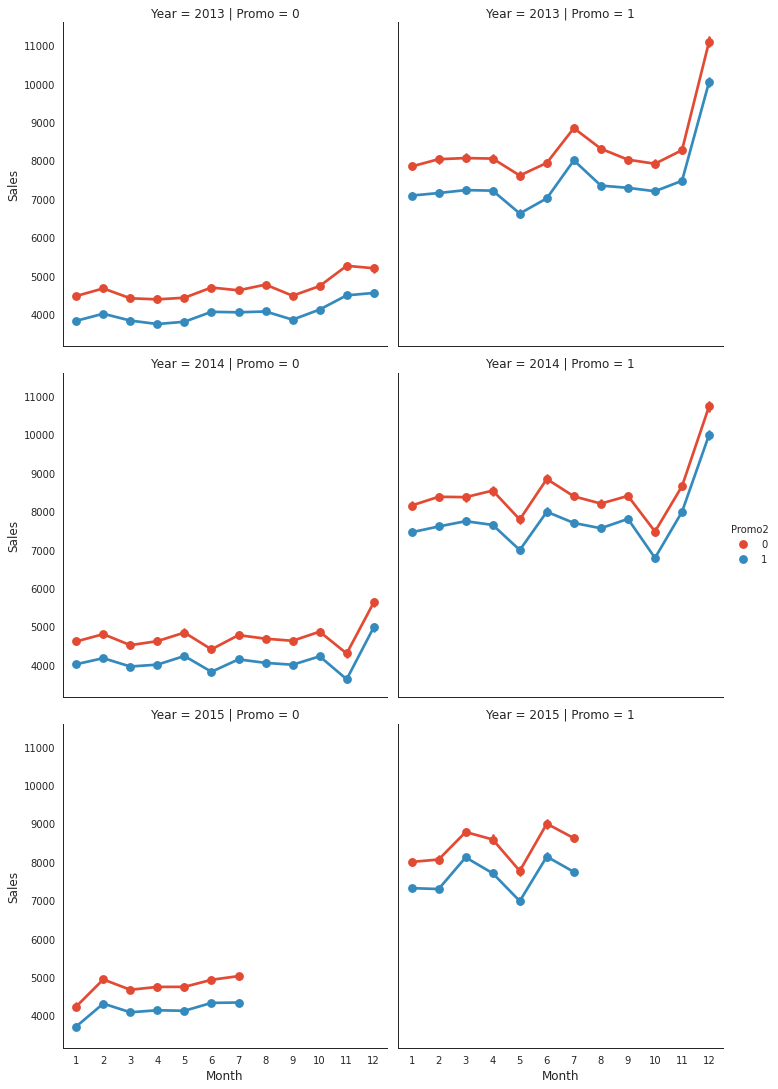

In [37]:
sns.factorplot(data = df, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



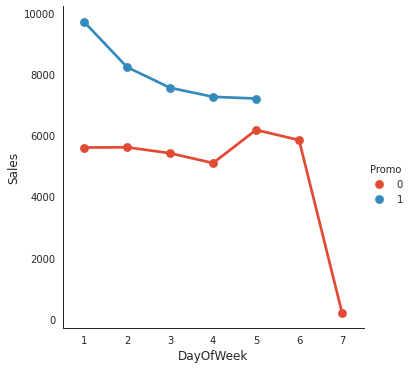

In [38]:
sns.factorplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo")

In [39]:
print("""So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.""")
print("There are", df[(df.Open == 1) & (df.DayOfWeek == 7)].Store.unique().shape[0], "stores opend on sundays")    

So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.
There are 33 stores opend on sundays


**Let's see the trends on a yearly basis.**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



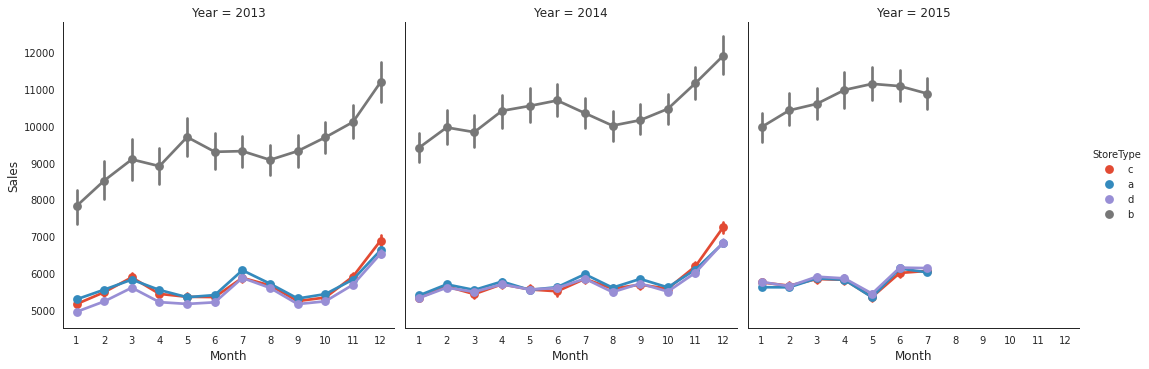

In [40]:
sns.factorplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")
# Yes, we can see a seasonalities, but not trends. The sales stays constantly yearly. 

**What about the Competition Distance. What kind of inpact does this have on the sales.**

In [41]:
df.CompetitionDistance.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance"], 5)

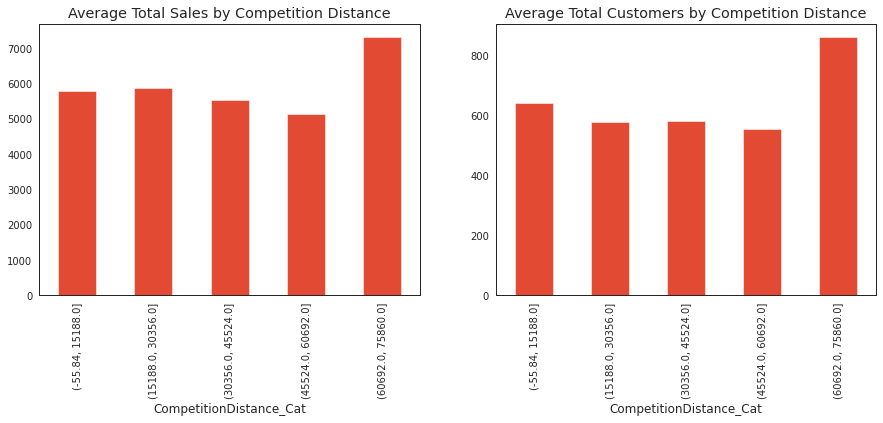

In [42]:
f, ax = plt.subplots(1,2, figsize = (15,5))

df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [60]:
df.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)

# My conclusion of the analysis:

StoreType A has the most sells and customers.

StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.

StoreTybe D had the highest buyer cart.

Promo runs only in weekdays.

Promo2 doesnt seems to be correlated to any significant change in the sales amount.

Customers tends to buy more on Monday, when there's promotion running (Promo) and on Sundays, when there is no promotion at all.

### Drop Subsets Of Data Where Might Cause Bias

In [43]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [44]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [45]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [46]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [47]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [48]:
df.shape

(844338, 18)

In [49]:
df.info

<bound method DataFrame.info of          Store  DayOfWeek  ... Avg_Customer_Sales  CompetitionDistance_Cat
0            1          5  ...           9.482883        (-55.84, 15188.0]
1            2          5  ...           9.702400        (-55.84, 15188.0]
2            3          5  ...          10.126675        (-55.84, 15188.0]
3            4          5  ...           9.342457        (-55.84, 15188.0]
4            5          5  ...           8.626118       (15188.0, 30356.0]
...        ...        ...  ...                ...                      ...
1016776    682          2  ...           5.962898        (-55.84, 15188.0]
1016827    733          2  ...           4.528818        (-55.84, 15188.0]
1016863    769          2  ...           4.034455        (-55.84, 15188.0]
1017042    948          2  ...           4.322425        (-55.84, 15188.0]
1017190   1097          2  ...           4.242705        (-55.84, 15188.0]

[844338 rows x 18 columns]>

###  Creating a New variable "Avg_sales"

#### creating a variable that calculates monthly average sales for each store

In [50]:
df_new=df.copy()

In [51]:
# calculate weekly average sales

sales = df_new[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales = sales.rename(columns={'Sales':'Avg_Sales'})
sales = sales.reset_index()

In [52]:
df_new['sales_key']=df_new['Year'].map(str) + df_new['Month'].map(str) + df_new['Store'].map(str)
sales['sales_key']=sales['Year'].map(str) + sales['Month'].map(str) + sales['Store'].map(str)

In [53]:
# drop extra columns
sales = sales.drop(['Year','Month','Store'], axis=1)

# merge
df_new = pd.merge(df_new, sales, how='left', on=('sales_key'))

### Creating new variable Avg_Customer

#### creating a variable that calculates Monthly average number of customers for each store, becuase daily number of customer is another variable to be predicted

In [54]:
# calculate weekly average
cust = df_new[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'Avg_Customer'})
cust = cust.reset_index()

In [55]:
df_new['cust_key']=df_new['Year'].map(str) + df_new['Month'].map(str) + df_new['Store'].map(str)
cust['cust_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)

In [56]:
# drop original feature Customers
df_new = df_new.drop('Customers', axis=1) # drop extra columns
cust = cust.drop(['Year', 'Month', 'Store'], axis=1)

In [57]:
# merge
df_new = pd.merge(df_new, cust, how="left", on=('cust_key'))

In [58]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2,Avg_Customer_Sales,CompetitionDistance_Cat,sales_key,Avg_Sales,cust_key,Avg_Customer
0,1,5,2015-07-31,5263,1,0,1,2015,7,31,31,c,a,1270.0,0,9.482883,"(-55.84, 15188.0]",201571,4491.333333,201571,519.407407
1,2,5,2015-07-31,6064,1,0,1,2015,7,31,31,a,a,570.0,1,9.702400,"(-55.84, 15188.0]",201572,4954.259259,201572,621.222222
2,3,5,2015-07-31,8314,1,0,1,2015,7,31,31,a,a,14130.0,1,10.126675,"(-55.84, 15188.0]",201573,6797.592593,201573,682.888889
3,4,5,2015-07-31,13995,1,0,1,2015,7,31,31,c,c,620.0,0,9.342457,"(-55.84, 15188.0]",201574,10256.851852,201574,1294.259259
4,5,5,2015-07-31,4822,1,0,1,2015,7,31,31,a,a,29910.0,0,8.626118,"(15188.0, 30356.0]",201575,4599.629630,201575,521.703704
